In [6]:
import kagglehub
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import os

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kevin\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


In [8]:
#reads the data from the file, extracts the csv file and stores it into a data frame

data_path = path + "\data.csv"
#file = os.path.join(path, "breast_cancer_data.csv")
df = pd.read_csv(data_path)
display(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [10]:
#Preprocess the data
cleaned_data = df.dropna(axis=1)
cleaned_data = df.drop(['Unnamed: 32'], axis=1)

display(cleaned_data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
from sklearn.model_selection import train_test_split

#Since we are using binary classification, map the target column 'Diagnosis' accordingly
cleaned_data['diagnosis'] = cleaned_data['diagnosis'].map({'M':1, 'B':0})

#Prepare feature and target variables
X = cleaned_data.drop(['id', 'diagnosis'], axis=1)
y = cleaned_data['diagnosis']
print(X.isnull().sum())
print(y.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
0


In [14]:
#Baseline Model - pick the ones or one that would be best for this dataset

#Log Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))


Accuracy:  0.956140350877193
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
#Random Forest

rforest_model = RandomForestClassifier(random_state=42)
rforest_model.fit(X_train, y_train)
y_pred = rforest_model.predict(X_test)

print(classification_report(y_test, y_pred))

feature_importances = pd.Series(rforest_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

area_worst                 0.153892
concave points_worst       0.144663
concave points_mean        0.106210
radius_worst               0.077987
concavity_mean             0.068001
perimeter_worst            0.067115
perimeter_mean             0.053270
radius_mean                0.048703
area_mean                  0.047555
concavity_worst            0.031802
area_se                    0.022407
texture_worst              0.021749
compactness_worst          0.020266
radius_se                  0.020139
compactness_mean           0.013944
texture_mean               0.013591
perimeter_se               0.011303
smoothness_worst           0.010644
symmetry_worst           

In [18]:
#SVM

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [24]:
#Extreme Gradient Boosting (XGBoost)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
print(xgb_importance.sort_values(ascending=False))



              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

concave points_worst       0.285641
concave points_mean        0.235738
perimeter_worst            0.174253
radius_worst               0.075987
area_worst                 0.057031
texture_worst              0.021676
concavity_worst            0.018667
perimeter_se               0.018553
texture_mean               0.014433
radius_mean                0.012819
area_mean                  0.012336
concavity_se               0.011444
area_se                    0.008527
concavity_mean             0.007317
radius_se                  0.005298
smoothness_worst           0.005140
fractal_dimension_se       0.004664
smoothness_mean            0.004639
texture_se               

C:\Users\kevin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:25:23] WARNING: D:\bld\xgboost-split_1727635012356\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


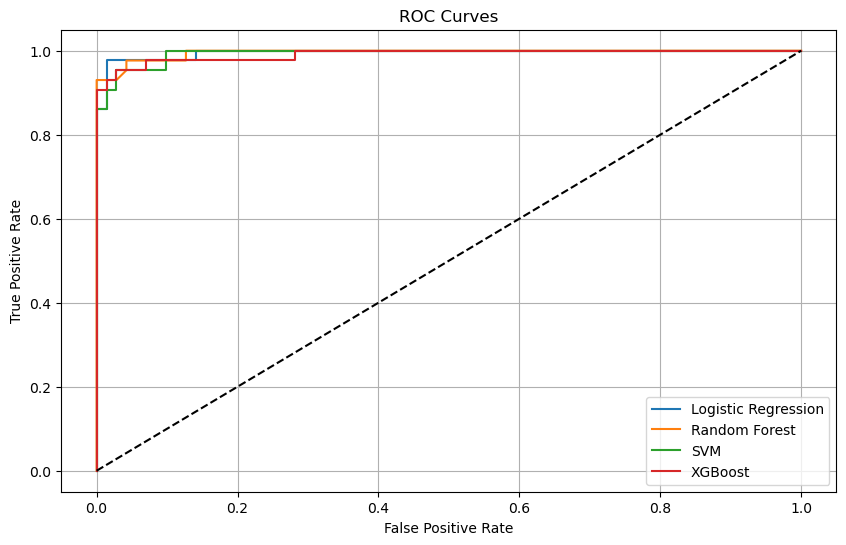

In [22]:
"""
4. Evaluate Your Model
Use metrics like:

Accuracy

Precision/Recall

F1-score

ROC AUC (great for imbalanced classes)
"""
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

log_probs = log_model.predict_proba(X_test)[:,1]
rf_probs = rforest_model.predict_proba(X_test)[:,1]
svm_probs = svm_model.predict_proba(X_test)[:,1]
xgb_probs = xgb_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(10,6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
"""
PCA or correlation heatmaps to check redundancy
"""

'\n 5. Feature Importance / Explainability\nWith 30 features, it’s important to understand which ones matter.\n\nUse:\n\nmodel.feature_importances_ (for tree models)\n\nPCA or correlation heatmaps to check redundancy\n'